# Language and Emotion Prediction Project

## Introduction

This machine learning project aims to predict the language and emotion of a given text. The project focuses on using Machie Learning concept, working with text data and utilizes various libraries and APIs to achieve its objectives.

## Project Overview

The project consists of two main tasks:

1. **Language Prediction**: Given a text input, the system predicts the language in which the text iss written from a set of 17 different languages.

2. **Emotion Prediction**: After determining the language, the system predicts the emotion behind the text. To do this, the following steps are taken:
    - Utilized the Google Translator API to translate the text into English, ensuring a consistent language for emotion analysis.
    - Applied a machine learning model or algorithm to predict the emotion associated with the translated text.

## Data Sources

The project utilizes the datasets from Kaggle Platform. 

## Technologies and Libraries Used

The following technologies and libraries are used in this project:

- Python: The primary programming language for data preprocessing, analysis, and model development.
- Jupyter Notebook: The development environment for the project.
- Scikit-Learn: Used for machine learning model development, evaluation and text preprocessing.
- Google Translator API: Used for language translation.
- Tensorflow: Used for development of Deep Learning Model for NLP and text preprocessing.
- Emotion Analysis Model or Algorithm: Deep Learning is used for emotion prediction.

## Project Workflow

The project follows these main steps:

1. Data Collection: Gathered text data in various languages.
2. Language Prediction: Developed a language classification model to predict the language of the text.
3. Translation: Utilized the Google Translator API to translate non-English text into English.
4. Emotion Prediction: Applied a deep learning model algorithm to predict the emotion of the translated text.
5. Evaluation: Assessed the accuracy and performance of the language and emotion prediction tasks.

## Conclusion

This project demonstrates the application of machine learning, deep learning and natural language processing techniques to perform language and emotion prediction on text data. It showcases how these predictions can be useful in various applications, such as sentiment analysis, customer feedback analysis, content recommendations, Mental Health Monitoring, etc. 
Some of the key Outcomes are as follows: 
1. The accuracy of Language Prediction is 96.03%. 
2. The accuracy of Emotion Prediction is 89.94%. 


Please feel free to explore the notebook for detailed code implementations and analysis of the results.


## Importing the libraries.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Reading the Dataset.

In [2]:
df = pd.read_csv('Language Detection.csv')
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [3]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

## Exploratory Data Analysis.

<AxesSubplot: xlabel='Language', ylabel='count'>

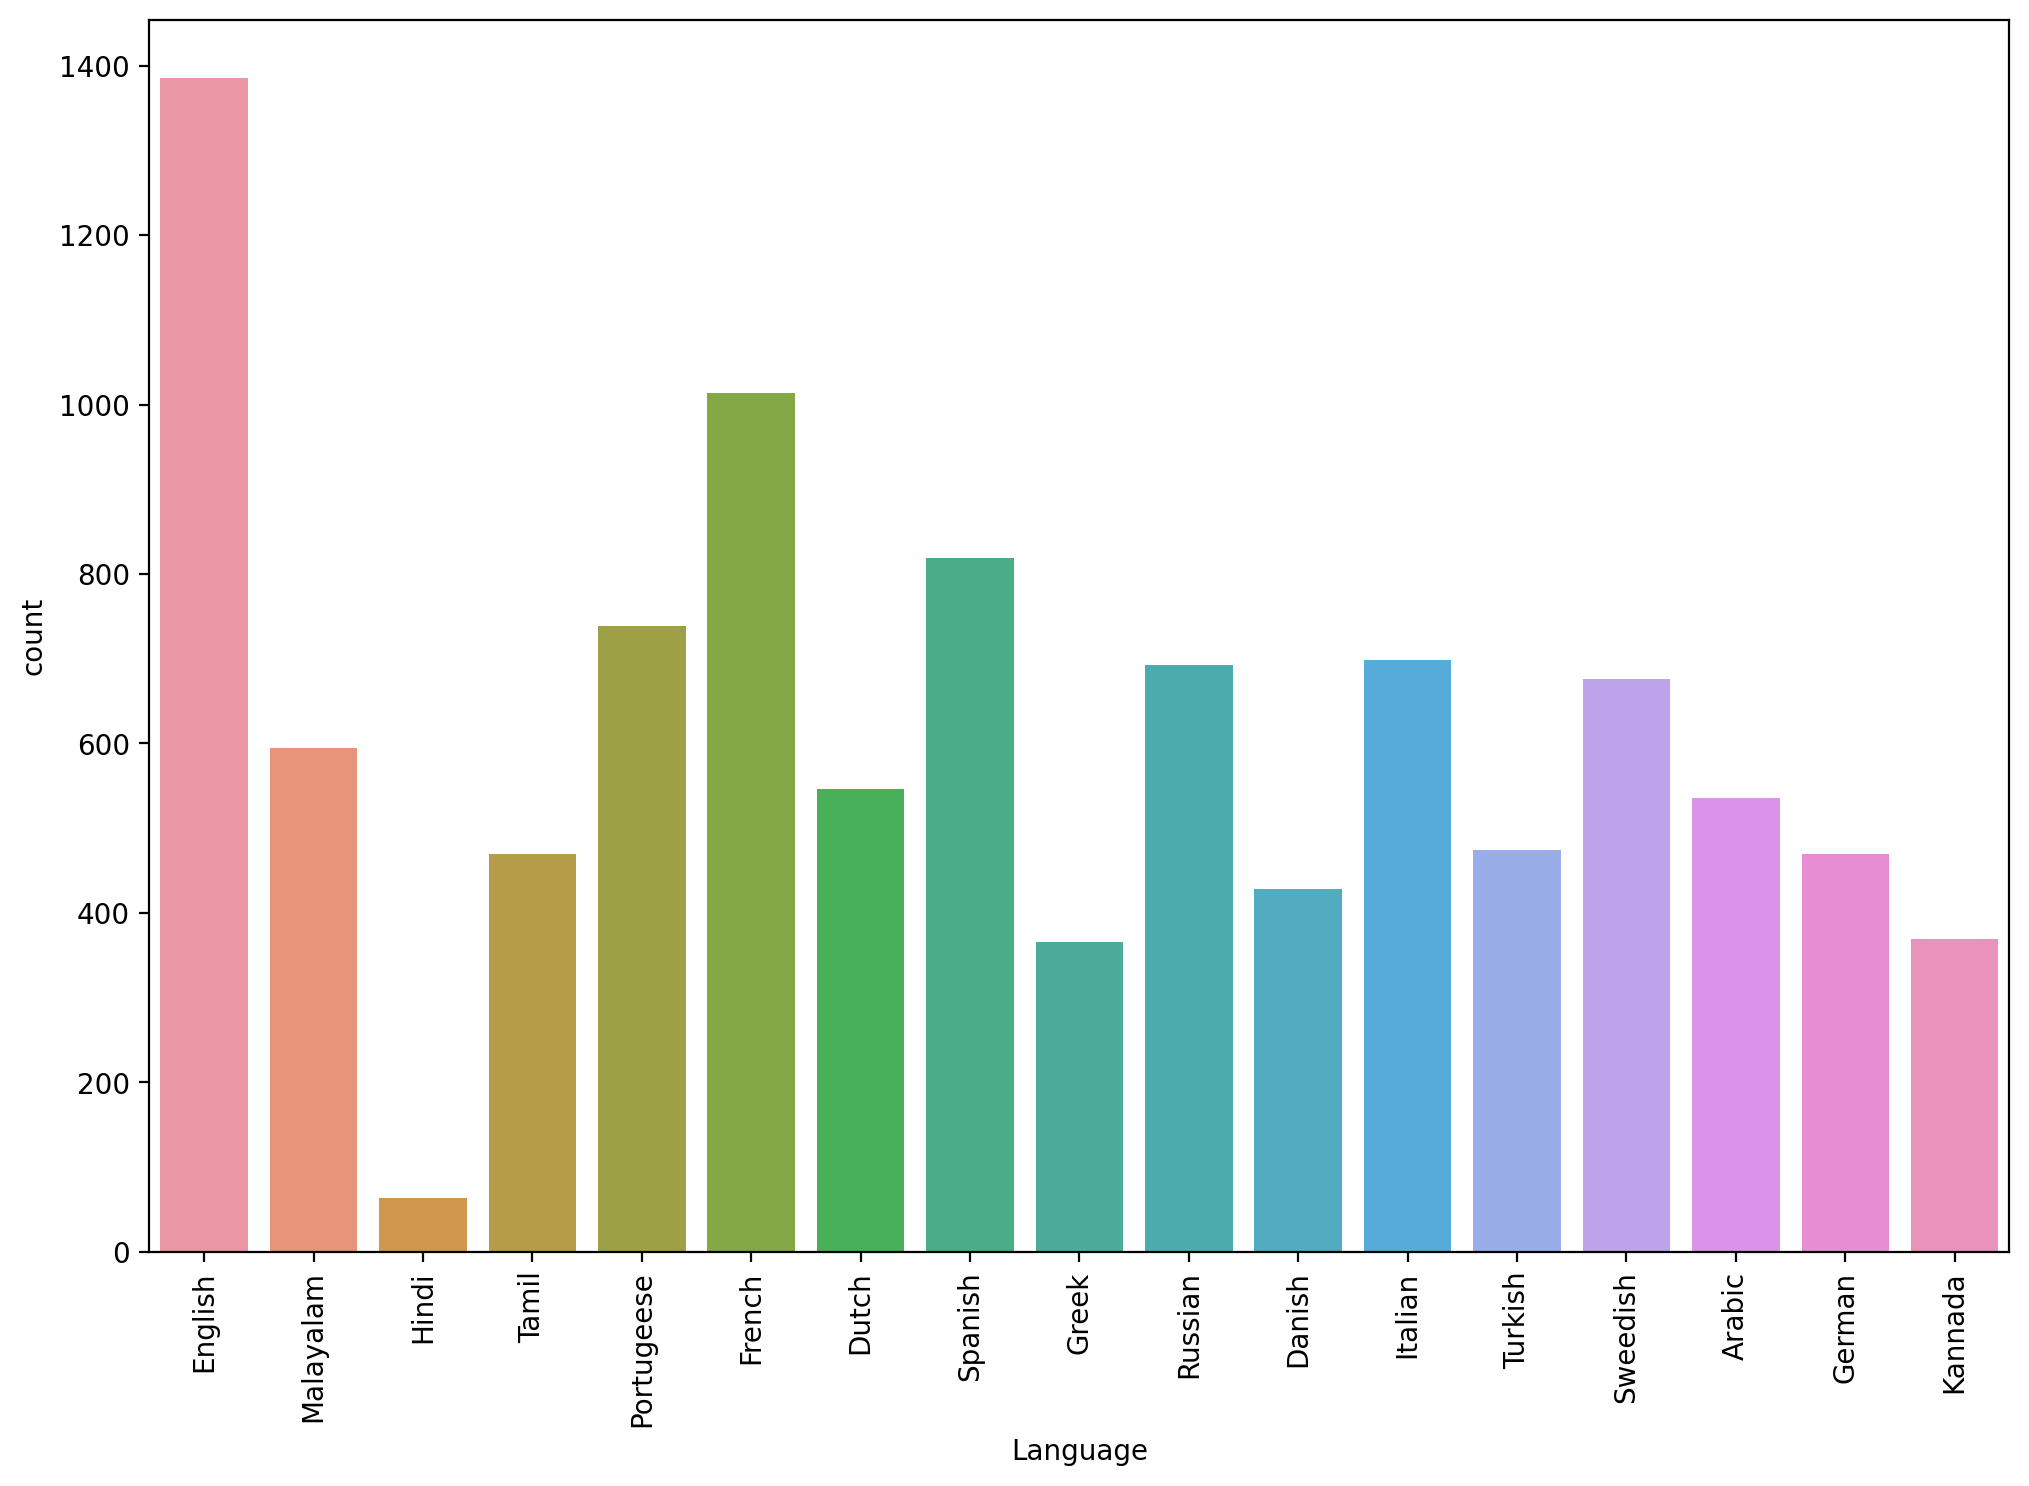

In [4]:
plt.figure(figsize=(12, 8), dpi=200)
plt.xticks(rotation=90)
sns.countplot(data=df, x='Language')

## Splitting the Dataset into Training and Testing Set.

In [5]:
X = df["Text"]
y = df['Language']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Text Preprocessing.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [9]:
X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

## Model Building And Model Selection.

In [10]:
from sklearn.naive_bayes import  MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [11]:
user = input("Enter a text: ")
data = tfidf.transform([user]).toarray()
output = mnb.predict(data)
print(output)

Enter a text: J'adore l'apprentissage automatique
['French']


In [12]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
user = input("Enter a text: ")
data = tfidf.transform([user]).toarray()
output = log_model.predict(data)
print(output)

Enter a text: J'adore l'apprentissage automatique
['French']


In [11]:
from sklearn.svm import SVC, LinearSVC

In [15]:
rb_svc = SVC()
rb_svc.fit(X_train, y_train)

SVC()

In [12]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

LinearSVC()

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=101)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=101)

In [13]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score

### Evaluation of the models that have been built.

In [15]:
def report_model(model):
    preds = model.predict(X_test)
    print(classification_report(y_test, preds))
    print(f"The Accuracy Score is:- {accuracy_score(y_test, preds)}")
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

              precision    recall  f1-score   support

      Arabic       1.00      0.91      0.95       160
      Danish       0.99      0.83      0.90       131
       Dutch       0.99      0.95      0.97       158
     English       0.79      1.00      0.88       419
      French       0.96      0.99      0.97       303
      German       1.00      0.95      0.97       137
       Greek       1.00      0.95      0.98       107
       Hindi       1.00      0.60      0.75        20
     Italian       1.00      0.95      0.97       236
     Kannada       1.00      0.95      0.98       103
   Malayalam       1.00      0.99      0.99       181
  Portugeese       0.99      0.97      0.98       215
     Russian       1.00      0.95      0.98       197
     Spanish       0.97      0.96      0.96       233
    Sweedish       0.95      0.98      0.96       214
       Tamil       1.00      0.99      0.99       144
     Turkish       1.00      0.78      0.88       144

    accuracy              

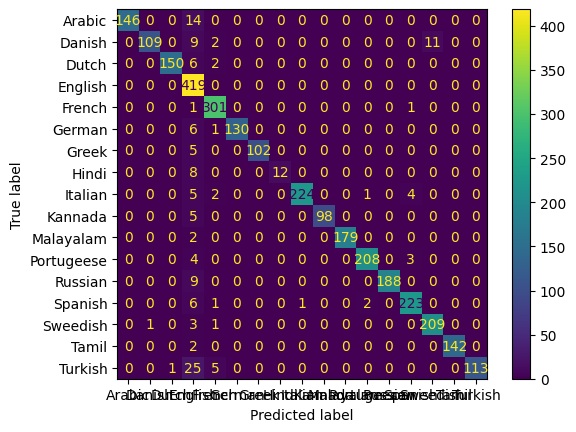

In [20]:
report_model(mnb)

              precision    recall  f1-score   support

      Arabic       1.00      0.88      0.93       160
      Danish       0.97      0.80      0.88       131
       Dutch       0.99      0.91      0.95       158
     English       0.66      1.00      0.79       419
      French       0.98      0.95      0.96       303
      German       1.00      0.94      0.97       137
       Greek       1.00      0.93      0.97       107
       Hindi       1.00      0.65      0.79        20
     Italian       1.00      0.91      0.95       236
     Kannada       1.00      0.93      0.96       103
   Malayalam       1.00      0.94      0.97       181
  Portugeese       1.00      0.90      0.95       215
     Russian       1.00      0.94      0.97       197
     Spanish       0.94      0.94      0.94       233
    Sweedish       0.99      0.93      0.96       214
       Tamil       1.00      0.95      0.98       144
     Turkish       1.00      0.76      0.86       144

    accuracy              

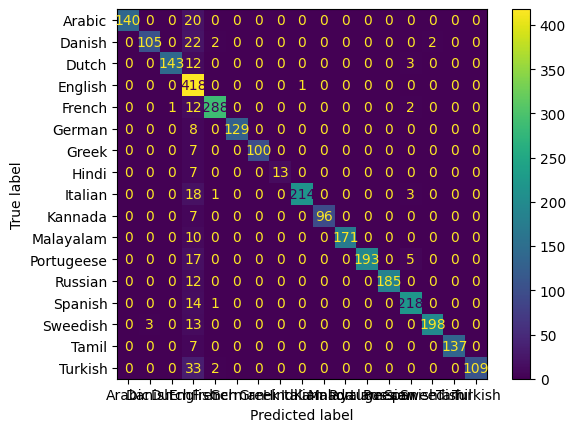

In [21]:
report_model(log_model)

              precision    recall  f1-score   support

      Arabic       1.00      0.82      0.90       160
      Danish       0.97      0.79      0.87       131
       Dutch       0.99      0.91      0.95       158
     English       0.64      0.98      0.78       419
      French       0.98      0.95      0.96       303
      German       1.00      0.91      0.95       137
       Greek       1.00      0.89      0.94       107
       Hindi       1.00      0.70      0.82        20
     Italian       1.00      0.90      0.95       236
     Kannada       0.68      0.94      0.79       103
   Malayalam       1.00      0.93      0.97       181
  Portugeese       0.99      0.88      0.93       215
     Russian       1.00      0.93      0.97       197
     Spanish       0.95      0.92      0.93       233
    Sweedish       0.99      0.90      0.95       214
       Tamil       1.00      0.93      0.96       144
     Turkish       1.00      0.74      0.85       144

    accuracy              

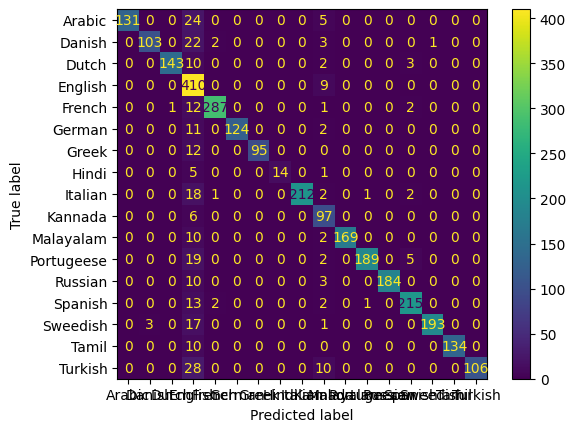

In [22]:
report_model(rb_svc)

              precision    recall  f1-score   support

      Arabic       1.00      0.92      0.96       160
      Danish       0.97      0.87      0.92       131
       Dutch       1.00      0.96      0.98       158
     English       0.83      0.99      0.90       419
      French       0.98      0.98      0.98       303
      German       0.99      0.98      0.99       137
       Greek       1.00      0.98      0.99       107
       Hindi       1.00      0.90      0.95        20
     Italian       0.99      0.96      0.97       236
     Kannada       1.00      0.96      0.98       103
   Malayalam       1.00      0.98      0.99       181
  Portugeese       0.99      0.95      0.97       215
     Russian       1.00      0.97      0.98       197
     Spanish       0.95      0.97      0.96       233
    Sweedish       0.97      0.96      0.96       214
       Tamil       1.00      0.99      1.00       144
     Turkish       1.00      0.87      0.93       144

    accuracy              

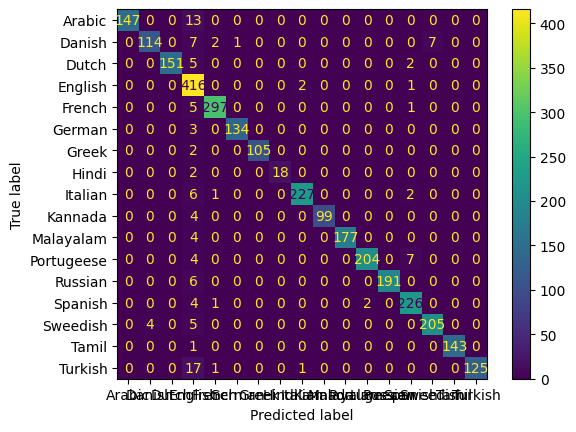

In [16]:
report_model(linear_svc)

              precision    recall  f1-score   support

      Arabic       1.00      0.85      0.92       160
      Danish       0.95      0.85      0.90       131
       Dutch       1.00      0.91      0.95       158
     English       0.97      0.87      0.91       419
      French       0.98      0.94      0.96       303
      German       0.96      0.95      0.96       137
       Greek       1.00      0.95      0.98       107
       Hindi       1.00      0.85      0.92        20
     Italian       0.97      0.92      0.94       236
     Kannada       0.33      1.00      0.49       103
   Malayalam       1.00      0.96      0.98       181
  Portugeese       0.97      0.91      0.94       215
     Russian       1.00      0.91      0.95       197
     Spanish       0.91      0.91      0.91       233
    Sweedish       0.98      0.93      0.95       214
       Tamil       1.00      0.99      0.99       144
     Turkish       1.00      0.80      0.89       144

    accuracy              

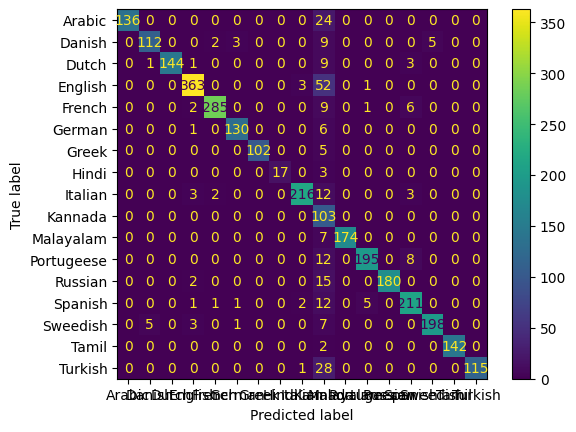

In [24]:
report_model(rfc)

### Conclusion: SVM Model with Linear Kernel performs the best. 

In [44]:
user = input("Enter the statement: ")

In [45]:
linear_svc.predict(tfidf.transform([user]))

array(['Tamil'], dtype=object)

## Translation of the user Entered Text into English.

In [19]:
from deep_translator import GoogleTranslator
translator = GoogleTranslator(source='auto', target='en')

In [46]:
english_output = translator.translate(user)
english_output

'I will kill you'

## Importing the Libraries required for training the Deep Learning Model.

In [21]:
import keras
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

## Reading the Dataset for Emotion Prediction.

In [22]:
data = pd.read_csv("train.txt", sep=';')
data.columns = ["Text", "Emotions"]
print(data.head())

                                                Text Emotions
0  i can go from feeling so hopeless to so damned...  sadness
1   im grabbing a minute to post i feel greedy wrong    anger
2  i am ever feeling nostalgic about the fireplac...     love
3                               i am feeling grouchy    anger
4  ive been feeling a little burdened lately wasn...  sadness


In [23]:
data

,Text,Emotions
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness
...,...,...
15994,i just had a very brief time in the beanbag an...,sadness
15995,i am now turning and i feel pathetic that i am...,sadness
15996,i feel strong and good overall,joy
15997,i feel like this was such a rude comment and i...,anger


## Exploratory Data Analysis.

<AxesSubplot: xlabel='Emotions', ylabel='count'>

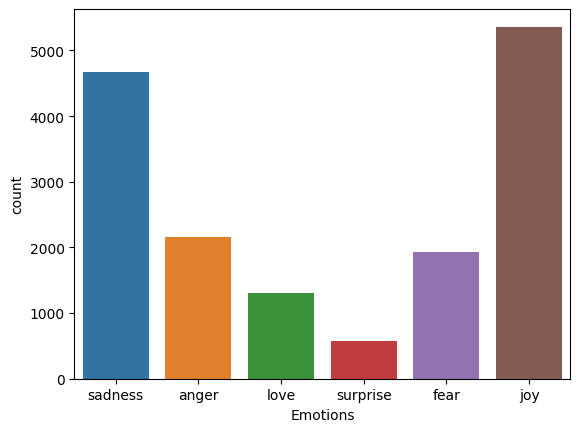

In [24]:
sns.countplot(data=data, x="Emotions")

## Text Preprocessing.

In [25]:
texts = data["Text"].tolist()
labels = data["Emotions"].tolist()

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

In [26]:
sequences = tokenizer.texts_to_sequences(texts)

max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

In [27]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [28]:
one_hot_labels = keras.utils.to_categorical(labels)

## Splitting into Training and Testing set.

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(padded_sequences, one_hot_labels, 
                                                test_size=0.2)


## Building the Deep Learning Model.

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, 
                    output_dim=128, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(one_hot_labels[0]), activation='softmax'),
])

In [31]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 66, 128)           1947264   
                                                                 
 bidirectional (Bidirectiona  (None, 66, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 2,091,846
Trainable params: 2,091,846
Non-

In [32]:
model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest))

Epoch 1/10
400/400 [==============================] - 67s 143ms/step - loss: 1.1592 - accuracy: 0.5560 - val_loss: 0.6833 - val_accuracy: 0.7769
Epoch 2/10
400/400 [==============================] - 61s 153ms/step - loss: 0.3701 - accuracy: 0.8743 - val_loss: 0.3854 - val_accuracy: 0.8806
Epoch 3/10
400/400 [==============================] - 51s 128ms/step - loss: 0.1819 - accuracy: 0.9391 - val_loss: 0.3110 - val_accuracy: 0.8975
Epoch 4/10
400/400 [==============================] - 51s 128ms/step - loss: 0.1118 - accuracy: 0.9631 - val_loss: 0.3846 - val_accuracy: 0.8847
Epoch 5/10
400/400 [==============================] - 51s 126ms/step - loss: 0.0776 - accuracy: 0.9745 - val_loss: 0.3242 - val_accuracy: 0.9034
Epoch 6/10
400/400 [==============================] - 52s 130ms/step - loss: 0.0662 - accuracy: 0.9778 - val_loss: 0.4033 - val_accuracy: 0.8919
Epoch 7/10
400/400 [==============================] - 53s 132ms/step - loss: 0.0492 - accuracy: 0.9834 - val_loss: 0.4052 - val_ac

### Thus, the Model Built gave an accuracy of 89.94% on the validation dataset.

## Prediction of the Emotion.

In [47]:
input_text = english_output

# Preprocessing the input text
input_sequence = tokenizer.texts_to_sequences([input_text])
padded_input_sequence = pad_sequences(input_sequence, maxlen=max_length)
prediction = model.predict(padded_input_sequence)
predicted_label = label_encoder.inverse_transform([np.argmax(prediction[0])])
print(predicted_label)

1/1 [==============================] - 0s 41ms/step
['fear']


## Saving all the required files.

In [38]:
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

In [48]:
import joblib
joblib.dump(model,"Emotion_Detector(lstm).joblib")

['Emotion_Detector(lstm).joblib']

In [49]:
joblib.dump(linear_svc,"LanguageDetector(LinearSVC).joblib")

['LanguageDetector(LinearSVC).joblib']

In [57]:
with open('Tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)